In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir("C://Digital Nest/Logistic Regression")

In [2]:
# Importing the dataset
iris = pd.read_csv('iris.csv')
print(iris.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [3]:
X = iris.iloc[::,2:4:1]
print(X.columns)
Y = iris.Species

Index(['PetalLength', 'PetalWidth'], dtype='object')


In [4]:
# apply one hot enconding on target
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y2 = LE.fit_transform(Y)
print(np.unique(Y2))

[0 1 2]


In [81]:
# convert the target into binary
Y2[Y2==2] = 1
print(np.unique(Y2,return_counts=True))

(array([0, 1]), array([ 50, 100], dtype=int64))


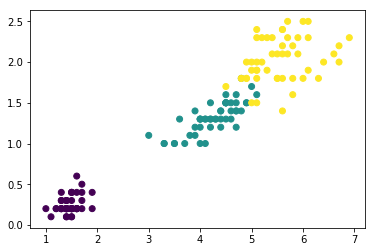

In [5]:
# draw graph between dependent and independent
plt.scatter(X.PetalLength,
            X.PetalWidth,
            c = Y2,
           cmap = 'viridis')
plt.show()

In [85]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2',C = 1.0, solver='lbfgs',class_weight='balanced')
LR.fit(X,Y2)
print(LR.coef_)
print(LR.intercept_)

[[3.58585212]]
[-19.83876425]


In [86]:
# define sigmoid function
import math
def sigmoid(x):
    return math.exp(x) / (1 + math.exp(x))

In [92]:
# predicted
Y_line = pd.Series((X.SepalLength * LR.coef_[0]) + LR.intercept_)
print(Y_line[0:5])
print(type(Y_line))
Y_Pred = pd.Series([sigmoid(x) for x in Y_line])
print(type(Y_Pred))
print(Y_Pred[0:5])

0   -1.550918
1   -2.268089
2   -2.985259
3   -3.343844
4   -1.909504
Name: SepalLength, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0    0.174954
1    0.093801
2    0.048096
3    0.034097
4    0.129037
dtype: float64


In [93]:
print(Y_Pred.max())
print(Y_Pred.min())

0.9997944195513516
0.011895831012968537


In [103]:
Y_Pred_Prob = LR.predict_proba(X)
print(Y_Pred_Prob[0:5])

[[0.82504634 0.17495366]
 [0.90619946 0.09380054]
 [0.95190373 0.04809627]
 [0.96590269 0.03409731]
 [0.87096337 0.12903663]]


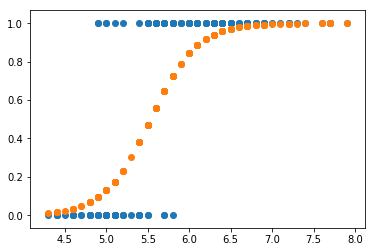

In [94]:
# scatter plot for predicted and independent
plt.scatter(X,Y2)
plt.scatter(X,Y_Pred)
plt.show()

In [9]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [6]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X,Y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
print(len(SVM.support_vectors_))

26


In [13]:
print(SVM.coef_)
print(SVM.intercept_)

[[-1.1        -0.7       ]
 [-0.61538458 -0.30769229]
 [-2.1829247  -2.25365588]]
[ 3.27999997  2.2923075  14.41486828]


In [97]:
# predict
Y_Pred2 = SVM.predict(X)

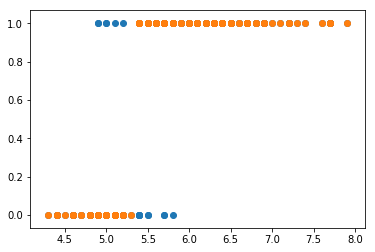

In [101]:
# scatter plot for predicted and independent
plt.scatter(X,Y2)
plt.scatter(X,Y_Pred2)
plt.show()

In [8]:
X1_Min = X.iloc[:, 0].min() - 0.25
X1_Max = X.iloc[:, 0].max() + 0.25
X1_Range = np.arange(start = X1_Min, stop = X1_Max, step = 0.01)
X2_Min = X.iloc[:, 1].min() - 0.25
X2_Max = X.iloc[:, 1].max() + 0.25
X2_Range = np.arange(start = X2_Min, stop = X2_Max, step = 0.01)
X1, X2 = np.meshgrid(X1_Range,X2_Range)
print(X1.shape)
print(X2.shape)
X12 = np.array([X1.ravel(), X2.ravel()]).T
print(X12.shape)

(290, 640)
(290, 640)
(185600, 2)


In [9]:
Z = SVM.predict(X12).reshape(X1.shape)
print(Z.shape)

(290, 640)


In [11]:
np.unique(Y2)

array([0, 1, 2])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


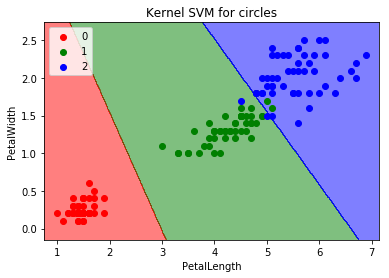

In [12]:
# Visualising the results
from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, Z,
             alpha = 0.50,cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in np.unique(Y2):
    plt.scatter(X.iloc[Y2 == i, 0], X.iloc[Y2 == i, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = i)
plt.title('Kernel SVM for circles')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()